# Data 

The Pima Indians dataset is about the prediction of diabetes . This is a small dataset available from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes

**Attribute Information:**

1. Number of times pregnant
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. Diastolic blood pressure (mm Hg)
4. Triceps skin fold thickness (mm)
5. 2-Hour serum insulin (mu U/ml)
6. Body mass index (weight in kg/(height in m)^2)
7. Diabetes pedigree function
8. Age (years)
9. Class variable (0 or 1) (diabetes mellitus)

In [127]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [128]:
#!pip install wget
import wget

In [129]:
# Download the data
!wget -O pima-indians-diabetes.csv https://gist.githubusercontent.com/ktisha/c21e73a1bd1700294ef790c56c8aec1f/raw/819b69b5736821ccee93d05b51de0510bea00294/pima-indians-diabetes.csv

--2019-06-06 13:24:54--  https://gist.githubusercontent.com/ktisha/c21e73a1bd1700294ef790c56c8aec1f/raw/819b69b5736821ccee93d05b51de0510bea00294/pima-indians-diabetes.csv
Resolving webproxy (webproxy)... 10.36.65.1
Connecting to webproxy (webproxy)|10.36.65.1|:3128... connected.
Proxy request sent, awaiting response... 200 OK
Length: 23628 (23K) [text/plain]
Saving to: ‘pima-indians-diabetes.csv’

pima-indians-diabet 100%[===================>]  23.07K  --.-KB/s    in 0.04s   

2019-06-06 13:24:55 (640 KB/s) - ‘pima-indians-diabetes.csv’ saved [23628/23628]



In [130]:
# check if the data is downloaded
%ls -l

total 0
-rw-r--r-- 1 nbuser nbuser   56522 Jun  6 13:24 12_Pima_Indians_Diabetes_TODO.ipynb
-rw-r--r-- 1 nbuser nbuser    5166 Nov 14  2018 Advertising.csv
-rw-r--r-- 1 nbuser nbuser   18079 Nov 14  2018 Auto.csv
-rw-r--r-- 1 nbuser nbuser  103854 Oct 15  2018 BirthWeights.csv
-rw-r--r-- 1 nbuser nbuser   34727 Nov 14  2018 Boston.csv
-rw-r--r-- 1 nbuser nbuser 1064467 Nov 14  2018 Caravan.csv
-rw-r--r-- 1 nbuser nbuser   21339 Nov 14  2018 Carseats.csv
-rw-r--r-- 1 nbuser nbuser  101215 Oct  9  2018 ch05.ipynb
-rw-r--r-- 1 nbuser nbuser  110349 Oct 15  2018 class1.ipynb
-rw-r--r-- 1 nbuser nbuser   17114 Oct 17  2018 class2.ipynb
-rw-r--r-- 1 nbuser nbuser   67469 Oct 24  2018 class3.ipynb
-rw-r--r-- 1 nbuser nbuser   26585 Nov 14  2018 Credit.csv
-rw-r--r-- 1 nbuser nbuser  462381 Nov 14  2018 Default.xlsx
-rw-r--r-- 1 nbuser nbuser   19925 Nov 14  2018 Heart.csv
-rw-r--r-- 1 nbuser nbuser   27687 Nov 14  2018 Hitters.csv
-rw-r--r-- 1 nbuser nbuser   10205 Nov 14  2018 Hitters_X_test

In [131]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np

In [132]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [133]:
# load pima indians dataset
dataset = np.loadtxt("pima-indians-diabetes.csv", delimiter=",")

In [134]:
dataset[:][0]

array([  6.   , 148.   ,  72.   ,  35.   ,   0.   ,  33.6  ,   0.627,
        50.   ,   1.   ])

In [135]:
# split dataset into input (X) and output (Y) variables
# output is the last column

X = dataset[:,[0,1,2,3,4,5,6,7]]
y = dataset[:,[8]]

In [136]:
# print the shape of x
#
# TODO
X.shape

(768, 8)

In [137]:
# save to number of input dimensions in input_dim
input_dim = (X.shape)[1]
input_dim

8

In [138]:
# shape of y
# TODO
y.shape

(768, 1)

In [139]:
# Create training and test sets
# Test size should be 15%
# The test and train set should be stratified
# use a random state (for reproducability) of 42
# TODO
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [140]:
# shape of X_test
# TODO
X_test.shape

(116, 8)

# Model

In [141]:
# 1. Create Sequential model
# 2. + 3. Add two hidden dense layers with 12 and 8 nodes. Both should have Relu activations 
# 4. Add a final output layer
# Think about how many nodes the final output layer should have and what activation function is appropiate
# TODO
model = Sequential()
model.add(Dense(12, activation='relu', input_dim=8))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))

In [142]:
from keras import losses
# Compile the model
# Think about what loss function is appropiate
# Use as the optimizer Adam
# Track as an additional metric Accuracy
# TODO
model.compile(optimizer='adam', metrics=['accuracy'], loss="mean_squared_error") # binary_crossentropy  mean_squared_error

In [143]:
# Fit the model
#
# Use 15% for Validation
# Train for 300 epochs
# User batch size = 10
# Save the model fitting into the variable history
# TODO

history = model.fit(X_train, y_train, epochs=300, batch_size=10)

Epoch 1/300
652/652 [==============================] - 0s - loss: 191.6804 - acc: 0.0307       
Epoch 2/300
652/652 [==============================] - 0s - loss: 8.6790 - acc: 0.1457      
Epoch 3/300
652/652 [==============================] - 0s - loss: 4.9599 - acc: 0.1948     
Epoch 4/300
652/652 [==============================] - 0s - loss: 3.3805 - acc: 0.2347     
Epoch 5/300
652/652 [==============================] - 0s - loss: 2.7689 - acc: 0.2669     
Epoch 6/300
652/652 [==============================] - 0s - loss: 2.3473 - acc: 0.2883     
Epoch 7/300
652/652 [==============================] - 0s - loss: 2.0150 - acc: 0.3160     
Epoch 8/300
652/652 [==============================] - 0s - loss: 1.6389 - acc: 0.3558     
Epoch 9/300
652/652 [==============================] - 0s - loss: 1.2243 - acc: 0.4218     
Epoch 10/300
652/652 [==============================] - 0s - loss: 1.0171 - acc: 0.4601     
Epoch 11/300
652/652 [==============================] - 0s - loss: 0.9558 

652/652 [==============================] - 0s - loss: 0.2248 - acc: 0.6948     
Epoch 90/300
652/652 [==============================] - 0s - loss: 0.2268 - acc: 0.6933     
Epoch 91/300
652/652 [==============================] - 0s - loss: 0.2162 - acc: 0.6917     
Epoch 92/300
652/652 [==============================] - 0s - loss: 0.2283 - acc: 0.6963     
Epoch 93/300
652/652 [==============================] - 0s - loss: 0.2148 - acc: 0.6979     
Epoch 94/300
652/652 [==============================] - 0s - loss: 0.2223 - acc: 0.6810     
Epoch 95/300
652/652 [==============================] - 0s - loss: 0.2065 - acc: 0.7009     
Epoch 96/300
652/652 [==============================] - 0s - loss: 0.2455 - acc: 0.6580     
Epoch 97/300
652/652 [==============================] - 0s - loss: 0.2189 - acc: 0.6718     
Epoch 98/300
652/652 [==============================] - 0s - loss: 0.2205 - acc: 0.7025     
Epoch 99/300
652/652 [==============================] - 0s - loss: 0.1950 - acc: 0.

652/652 [==============================] - 0s - loss: 0.1737 - acc: 0.7377     
Epoch 177/300
652/652 [==============================] - 0s - loss: 0.1675 - acc: 0.7500     
Epoch 178/300
652/652 [==============================] - 0s - loss: 0.1702 - acc: 0.7546     
Epoch 179/300
652/652 [==============================] - 0s - loss: 0.1772 - acc: 0.7439     
Epoch 180/300
652/652 [==============================] - 0s - loss: 0.1813 - acc: 0.7653     
Epoch 181/300
652/652 [==============================] - 0s - loss: 0.1785 - acc: 0.7408     
Epoch 182/300
652/652 [==============================] - 0s - loss: 0.1673 - acc: 0.7546     
Epoch 183/300
652/652 [==============================] - 0s - loss: 0.1853 - acc: 0.7362     
Epoch 184/300
652/652 [==============================] - 0s - loss: 0.1829 - acc: 0.7377     
Epoch 185/300
652/652 [==============================] - 0s - loss: 0.1698 - acc: 0.7515     
Epoch 186/300
652/652 [==============================] - 0s - loss: 0.1867

652/652 [==============================] - 0s - loss: 0.1675 - acc: 0.7699     
Epoch 264/300
652/652 [==============================] - 0s - loss: 0.1676 - acc: 0.7607     
Epoch 265/300
652/652 [==============================] - 0s - loss: 0.1662 - acc: 0.7699     
Epoch 266/300
652/652 [==============================] - 0s - loss: 0.1619 - acc: 0.7561     
Epoch 267/300
652/652 [==============================] - 0s - loss: 0.1747 - acc: 0.7577     
Epoch 268/300
652/652 [==============================] - 0s - loss: 0.1552 - acc: 0.7653     
Epoch 269/300
652/652 [==============================] - 0s - loss: 0.1929 - acc: 0.7469     
Epoch 270/300
652/652 [==============================] - 0s - loss: 0.1824 - acc: 0.7270     
Epoch 271/300
652/652 [==============================] - 0s - loss: 0.1663 - acc: 0.7377     
Epoch 272/300
652/652 [==============================] - 0s - loss: 0.1938 - acc: 0.7347     
Epoch 273/300
652/652 [==============================] - 0s - loss: 0.1680

In [144]:
# list all data in history
print(history.history.keys())

dict_keys(['acc', 'loss'])


In [145]:
#score = model.evaluate(X_test, y_test, batch_size=10)

In [146]:
# Plot the History of Training Loss (history.history['loss']) and the Validation Loss (history.history['val_loss'])
# Title should be "Model Loss"
# x label: "Loss"
# y label: "Epoch"
# Legend: "Train" and "Validation"
# TODO

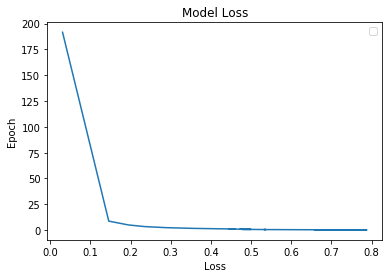

In [147]:
# Plot the History of Training Accuracy (history.history['acc']) and 
# the Validation Accuracy (history.history['val_loss'])
#
# Title should be "Model Accuracy"
# x label: "Accuracy"
# y label: "Epoch"
# Legend: "Train" and "Validation"
# TODO

plt.plot((history.history['acc']), (history.history['loss']))
plt.title("Model Loss")
plt.xlabel("Loss")
plt.ylabel("Epoch")
plt.legend("Train", "Validation")
plt.show()

In [148]:
# Evaluate the loss and accuracy on the test data
loss, accuracy = model.evaluate(X_test, y_test, batch_size=10)

 10/116 [=>............................] - ETA: 1s

In [149]:
print('Test score:', loss)
print('Test accuracy:', accuracy)

Test score: 0.19813529864467425
Test accuracy: 0.6896551713861269
